In [538]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
from matplotlib import pyplot as plt

# Assignment #1 - Basic Data Exploration in Python

## Assignment Overview

In this assignment you'll load some data into a python notebook, and use some basic functions to do some basic analysis. Each section asks you to either calculate some answers or explore some information found in the data. When generating your answers, try to think about a few factors that can make your code better:
<ul>
<li> Present the answers clearly. Use the markdown cells, code comments, and formatting to help make your answers readable. One of the features of notebooks is that they allow us to combine code and commentary, and we need to ensure both are readable. Refer to the guide in the guides folder of the exercises workbook for an explaination and examples of different formatting. 
<li> Make your code clear. It is easy to make sense of small pieces of code, for short periods of time, so if your code makes little sense here, it won't really hurt your ability to find the answers. If you need to come back to it later, or others need to edit it, having code that doesn't make sense is a big issue. Use things like clearly named variables, comments, and spacing to make things readable. Even in this course, if you are looking back to something from 2 months ago for the project, it is far easier to understand code that is cleaned up a little. 
<li> Structure the code well. If there is some kind of repetitive task, it should likely be moved into a function. If there is something that happens several times, it should be in a loop. Having well structured code makes it easy to reuse stuff later, understand how things work, debug errors, and share code with others. This is something to keep in the back of your minds, right now you may not have much experience to lean on to judge how things should be, as you read, adjust, and write code it will become more clear. 
</ul>

## Peer Evaluation

This assignemnt will have a peer evaluation for the grade - you'll each read some other notebooks and evaluate their answers. The reason for this is not (entirely) my personal laziness, we are hoping to accomplish a couple of things:
<ul>
<li> Quick experience reading notebooks. One of the important skills we need to have is the ability to read examples that we find and adapting it to our scenario. This is practice with data you're now comfortable with.
<li> Critically evaluating what makes sense in a data notebook. You know how you attempted to explain your look at the data, how did other people do it? What was better? What was worse?
<li> Design is subjective. This will give you a set of opinions that are not mine. You will end up with plenty of feedback of what I think, feadback of others early-on should hopefully help you make things appealing to all and not tailored to me. 
</ul>
Doing this right up front will hopefully help kickstart some of that expericence. 

### Grading

The detailed grading is defined in the marking guide in the Moodle workshop. Note that there's points both for getting a correct answer and for presenting it in a way that makes sense. 

## Structure

Each section contains a set of questions/prompts and a rough framework for your responses. You can change the structure around, just make sure it is readable. What I have there is just a loose guide to help get you started, you're not bound to it. 

## Load Data

Load the labor data into a dataframe. You probably don't want to change this section. 

In [539]:
#Load/preview data
df = pd.read_csv("LabourTrainingEvaluationData.csv")
df.head()

,Age,Eduacation,Race,Hisp,MaritalStatus,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
0,45,LessThanHighSchool,NotBlack,NotHispanic,Married,1,21516.670,25243.550,25564.670
1,21,Intermediate,NotBlack,NotHispanic,NotMarried,0,3175.971,5852.565,13496.080
2,38,HighSchool,NotBlack,NotHispanic,Married,0,23039.020,25130.760,25564.670
3,48,LessThanHighSchool,NotBlack,NotHispanic,Married,1,24994.370,25243.550,25564.670
4,18,LessThanHighSchool,NotBlack,NotHispanic,Married,1,1669.295,10727.610,9860.869


In [540]:
df.describe()

,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,15992.000000,15992.000000,15992.000000,15992.000000,15992.000000
mean,33.225238,0.295835,14016.800304,13650.803376,14846.659673
std,11.045216,0.456432,9569.795893,9270.403225,9647.391524
min,16.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,0.000000,4403.452250,4398.823000,5669.298000
50%,31.000000,0.000000,15123.580000,14557.110000,16421.975000
75%,42.000000,1.000000,23584.180000,22923.737500,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


## Part 1 - Age

<ol>
<li> Make and plot a Hist and Pmf for age.
<li> What fraction of the people in the data are 51? What fraction are older than 51?
<li> What is the median age? 
<li> Does the distribution of the sample data seem to mirror the working age population?
</ol>

#### Make and plot a Hist and Pmf for age.

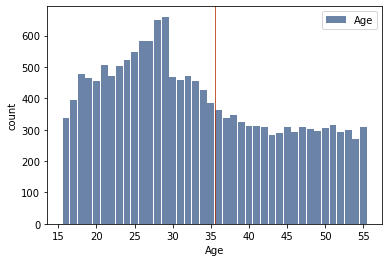

In [541]:
hist = thinkstats2.Hist(round(df["Age"],1), label='Age')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Age', ylabel='count')
thinkplot.axvline(np.mean(hist), color="green")
thinkplot.axvline(np.median(hist), color="red")


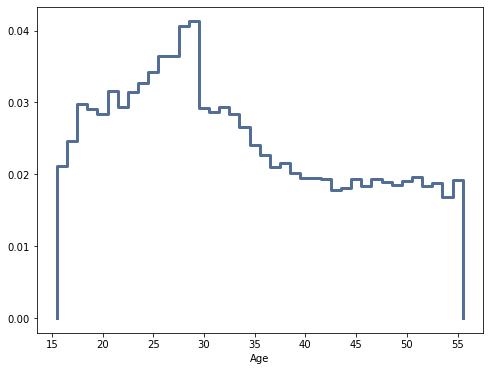

<Figure size 576x432 with 0 Axes>

In [542]:
Age = df['Age']
Agepmf = thinkstats2.Pmf(Age)
thinkplot.PrePlot(cols=1)
thinkplot.Pmfs([Agepmf])
thinkplot.Show(xlabel="Age")

#### What fraction of the people in the data are 51? What fraction are older than 51?

In [543]:
print('There are 314 people that are 51')
df_1 = df[df["Age"] == 51]
df_1.describe()


There are 314 people that are 51


,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,314.0,314.000000,314.000000,314.000000,314.000000
mean,51.0,0.401274,17752.741126,17091.337595,15987.439020
std,0.0,0.490939,8810.443519,8699.280625,10165.684651
min,51.0,0.000000,0.000000,0.000000,0.000000
25%,51.0,0.000000,12044.107500,11804.937500,6103.379750
50%,51.0,0.000000,20874.030000,19817.080000,19879.120000
75%,51.0,1.000000,25862.320000,25243.550000,25564.670000
max,51.0,1.000000,25862.320000,25243.550000,25564.670000


In [544]:
print('There are 1171 people that are over 51')
df_1 = df[df["Age"] > 51]
df_1.describe()

There are 1171 people that are over 51


,Age,Nodeg,Earnings_1974,Earnings_1975,Earnings_1978
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,53.503843,0.428693,16484.214637,15544.594755,14254.840889
std,1.130287,0.495101,9434.939058,9178.035205,10187.787234
min,52.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,9669.961500,8453.903500,2360.668000
50%,53.000000,0.000000,19089.140000,17717.030000,15827.930000
75%,55.000000,1.000000,25862.320000,25243.550000,25564.670000
max,55.000000,1.000000,25862.320000,25243.550000,25564.670000


##### What is the median age?

In [545]:
sample_col = df["Age"]
print("The Median for", sample_col.name, "is:")

print("Median:", sample_col.median())

The Median for Age is:
Median: 31.0


##### Does the distribution of the sample data seem to mirror the working age population?

##### I would argue that the Data does indeed represent the working age. Looking at the various ages, we know that working age starts at 16 and ends at 55. Most importantly the working age starts to peak at lower ages and maxes out in your 30's. This is representative because we know that most of the time, people work the most when they are in their 30's and not so much when they get closer to retirement.

### Part 2 - Demographics

<ul>
<li>Consider some of the demographic features: 
    <ul>
    <li>Education
    <li>Race
    <li>Hisp
    <li>MaritalStatus
    <li>Nodeg. 
    </ul>
</ul>
<ol>
<li>This data came from the United States, does it appear to be a representative sample of the US population?
<li>Demonstrate this in some way in your code. 
</ol>

##### Exploring the data...

In [546]:
print(df.value_counts())
print(df.describe())



Age  Eduacation  Race      Hisp         MaritalStatus  Nodeg  Earnings_1974  Earnings_1975  Earnings_1978
33   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         35
32   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         31
34   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         28
43   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         27
38   HighSchool  NotBlack  NotHispanic  Married        0      25862.32       25243.55       25564.67         26
                                                                                                             ..
26   HighSchool  NotBlack  NotHispanic  Married        0      17615.77       22946.56       23614.07          1
                                                              17705.89       20923.50       22196.93          

### Eduacation

In [547]:
Edu = df['Eduacation']
print(Edu.value_counts(),"\n")
print(Edu.describe())


HighSchool            6252
LessThanHighSchool    4731
Intermediate          2708
graduate              1367
PostGraduate           934
Name: Eduacation, dtype: int64 

count          15992
unique             5
top       HighSchool
freq            6252
Name: Eduacation, dtype: object


### Race

In [548]:
Race = df['Race']
print(Race.value_counts(),"\n")
print(Race.describe())

NotBlack    14816
black        1176
Name: Race, dtype: int64 

count        15992
unique           2
top       NotBlack
freq         14816
Name: Race, dtype: object


### Hispanic

In [549]:
Hisp = df['Hisp']
print(Hisp.value_counts(),"\n")
print(Hisp.describe())

NotHispanic    14840
hispanic        1152
Name: Hisp, dtype: int64 

count           15992
unique              2
top       NotHispanic
freq            14840
Name: Hisp, dtype: object


### Marital Status

In [550]:
Marital_Status = df['MaritalStatus']
print(Marital_Status.value_counts(),"\n")
print(Marital_Status.describe())

Married       11382
NotMarried     4610
Name: MaritalStatus, dtype: int64 

count       15992
unique          2
top       Married
freq        11382
Name: MaritalStatus, dtype: object


### Nodeg.

In [551]:
Nodeg = df['Nodeg']
print(Nodeg.value_counts(),"\n")
print(Nodeg.describe())



0    11261
1     4731
Name: Nodeg, dtype: int64 

count    15992.000000
mean         0.295835
std          0.456432
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: Nodeg, dtype: float64


##### Demographic Conclusion


##### If we break down each demographic, I would argue as a whole this sample does represent the US working population. Education has a good representation of people being graduated as compared to not graduated, where there is slightly more people being graduated. This is true, as you would expect more people to graduate rather than not. When we look at race, we see that there is way more people that are not black compared to people that are. This is also true for hispanic people. So we can conclude that the data sample does in some way represent the working population in the 70's as you would expect the data to show less people of color working and more white people working. Marital status has way more people married then not. I would imagine this to be true as you would expect people that want to provide for a family will have more jobs as compared to not. And lastly, not having a degree as compared to having one is probably more common because most people do not go to post-secondary after high school.

### Part 3 - Earnings

<ol>
<li>Make and plot a graph or graph of your choosing of the 3 earnings values, in order to answer the below question. Identify how the graph gave you your answer.
    <ul>
    <li>What is one conclusion could you draw from visualizing of the earnings in the different year? Please express it in plain language/non-statistics terms/as though you were explaining to one of your friends what happened to earnings between 1974 and 1978?
    </ul>
<li>Which has the greatest effect size on 1978 earnings: Race, Hispanic, MaritalStatus, or Nodeg? 
    <ul>
    <li>What could you investigate further in an attempt to explain this?
    </ul>
    </ul>
<li>Are there outliers in the 1978 earnings data? Demonstrate this in some way with your code. 
    <ul>
    <li>What can you infer from the presence of outliers that may impact analysis of this data.
    </ul>
</ol>

##### Plot Earnings Data

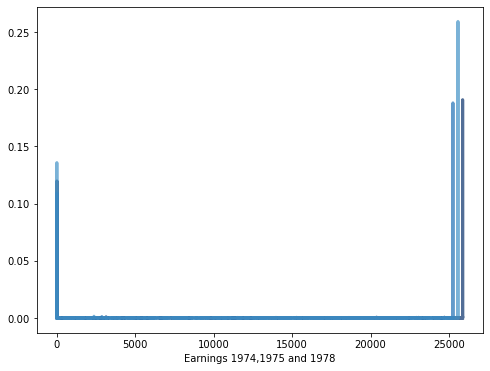

<Figure size 576x432 with 0 Axes>

In [552]:
Earn1974 = df['Earnings_1974']
Earn1975 = df['Earnings_1975']
Earn1978 = df['Earnings_1978']

Earnings1974pmf = thinkstats2.Pmf(Earn1974)
Earnings1975pmf = thinkstats2.Pmf(Earn1975)
Earnings1978pmf = thinkstats2.Pmf(Earn1978)

thinkplot.PrePlot(cols=1)
thinkplot.Pmfs([Earnings1974pmf,Earnings1975pmf,Earnings1978pmf])
thinkplot.Show(xlabel="Earnings 1974,1975 and 1978")


As a conclusion, there seems to be a large jump in the number of people earning near the top end, around $25k. Otherwise the distributions are pretty similar. 

##### Cohen Effect Sizes


In [553]:
def CohenEffectSize(group1, group2):

    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

### Race Effect Size

In [554]:
NotBlack = df[df["Race"] == 'NotBlack' ]
Black = df[df["Race"] != 'NotBlack']

In [555]:
CohenEffectSize(NotBlack["Earnings_1978"], Black["Earnings_1978"])

0.31883255859070525

### Hispanic Effect Size

In [556]:
NotHispanic = df[df["Hisp"] == 'NotHispanic' ]
hispanic = df[df["Hisp"] != 'NotHispanic']

In [557]:
CohenEffectSize(NotHispanic["Earnings_1978"], hispanic["Earnings_1978"])

0.16210284395555566

### Marital Status Effect Size

In [558]:
NotMarried = df[df["MaritalStatus"] == 'NotMarried' ]
Married = df[df["MaritalStatus"] != 'NotMarried' ]

In [559]:
CohenEffectSize(Married["Earnings_1978"], NotMarried["Earnings_1978"])

0.5737396692403472

### Nodeg. Effect Size

In [560]:
Degree = df[df["Nodeg"] == 1 ]
NoDegree = df[df["Nodeg"] != 1 ]

In [561]:
CohenEffectSize(NoDegree["Earnings_1978"], Degree["Earnings_1978"])

0.3367928897615812

##### Marital Status is shown to have the greatest effect size. So this shows that depending on whether or not you are married, that decision is more likely to have a role in how much money you make.

#### What to investigate further

##### Marital Status Statistics

In [562]:
print("Married:", Married["Earnings_1978"].describe())
print("Not Married:", NotMarried["Earnings_1978"].describe())

Married: count    11382.000000
mean     16390.997167
std       9594.652211
min          0.000000
25%       8446.316000
50%      19664.850000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64
Not Married: count     4610.000000
mean     11033.720550
std       8669.880629
min          0.000000
25%       2965.797500
50%       9982.043000
75%      17812.145000
max      25564.670000
Name: Earnings_1978, dtype: float64


c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


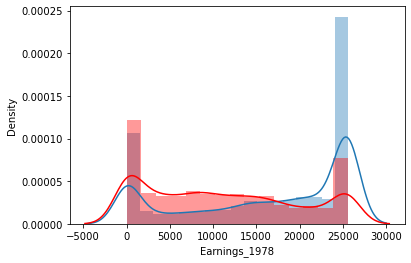

In [563]:
sns.distplot(Married["Earnings_1978"], kde_kws={"label":"Married PDF"}, hist_kws={"label":"Married"})
sns.distplot(NotMarried["Earnings_1978"], kde_kws={"label":"Not Married PDF", "color":"red"}, hist_kws={"label":"Not Married", "color":"red"})
plt.show()

##### Race Statistics

In [564]:
print("Black:", Black["Earnings_1978"].describe())
print("Not Black:", NotBlack["Earnings_1978"].describe())


Black: count     1176.000000
mean     12006.682951
std       9349.118836
min          0.000000
25%       2465.217500
50%      12115.880000
75%      20655.290000
max      25564.670000
Name: Earnings_1978, dtype: float64
Not Black: count    14816.000000
mean     15072.078992
std       9635.184976
min          0.000000
25%       5999.200500
50%      16894.110000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


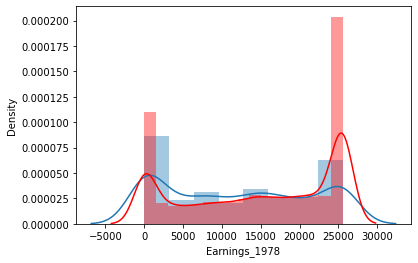

In [565]:
sns.distplot(Black["Earnings_1978"], kde_kws={"label":"Black PDF"}, hist_kws={"label":"Black"})
sns.distplot(NotBlack["Earnings_1978"], kde_kws={"label":"Not Black PDF", "color":"red"}, hist_kws={"label":"NotBlack", "color":"red"})
plt.show()

##### Hispanic Statistics

In [566]:
print("Hispanic:", hispanic["Earnings_1978"].describe())
print("Not Hispanic:", NotHispanic["Earnings_1978"].describe())

Hispanic: count     1152.000000
mean     13396.677888
std       9023.243588
min          0.000000
25%       5266.986750
50%      13717.740000
75%      21944.977500
max      25564.670000
Name: Earnings_1978, dtype: float64
Not Hispanic: count    14840.000000
mean     14959.218906
std       9685.372409
min          0.000000
25%       5719.910500
50%      16717.520000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


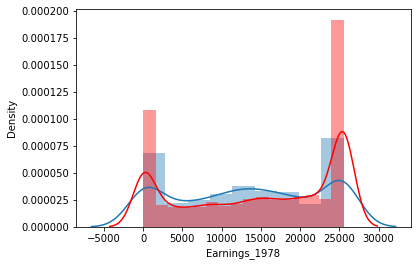

In [567]:
sns.distplot(hispanic["Earnings_1978"], kde_kws={"label":"Hispanic PDF"}, hist_kws={"label":"Hispanoc"})
sns.distplot(NotHispanic["Earnings_1978"], kde_kws={"label":"Not Hispanic PDF", "color":"red"}, hist_kws={"label":"Not Hispanic", "color":"red"})
plt.show()

##### Nodeg Statistics

In [568]:
print("Degree:", Degree["Earnings_1978"].describe())
print("No Degree:", NoDegree["Earnings_1978"].describe())

Degree: count     4731.000000
mean     12585.205679
std       8996.683952
min          0.000000
25%       4241.814000
50%      12412.900000
75%      20807.130000
max      25564.670000
Name: Earnings_1978, dtype: float64
No Degree: count    11261.000000
mean     15796.747484
std       9753.212109
min          0.000000
25%       6895.072000
50%      18693.240000
75%      25564.670000
max      25564.670000
Name: Earnings_1978, dtype: float64


c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


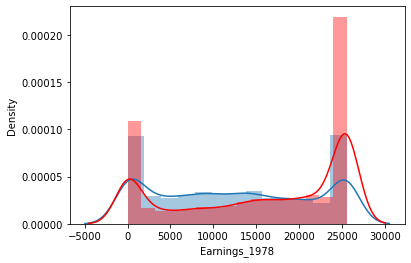

In [569]:
sns.distplot(Degree["Earnings_1978"], kde_kws={"label":"Degree PDF"}, hist_kws={"label":"Degree"})
sns.distplot(NoDegree["Earnings_1978"], kde_kws={"label":"No Degree PDF", "color":"red"}, hist_kws={"label":"No Degree", "color":"red"})
plt.show()

### Conclusion

 So if we look at and compare the means of each group we can see theres a bit more of a difference between marital status mean and the other demographics. This shows that there is a bit of a  difference in earnings and whether or not you are married or not married. Furthermore if we plot the values we can see that marital status has the most spread out values as compared to the others. We could also look at other influences to determine why Marital Status plays an important role. Maybe age could be an influence to this, as the more older you are the more likely you are to be married and being old might lead to more people having senior level positions that earn more income. 

In [570]:
Under_30 = df[df["Age"] <= 30 ]
Over_30 = df[df["Age"] >= 30 ]

c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\Luke\anaconda3\envs\backup_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


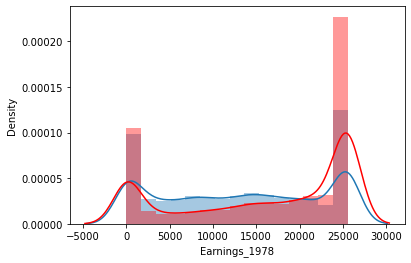

In [571]:
sns.distplot(Under_30["Earnings_1978"], kde_kws={"label":"Under 30"}, hist_kws={"label":"Under 30"})
sns.distplot(Over_30["Earnings_1978"], kde_kws={"label":"Over 30", "color":"red"}, hist_kws={"label":"Over 30", "color":"red"})
plt.show()

##### As we can see this data shows that people over 30 (red) are more likely to make higher income than people that are under 30 (blue). If we were exploring this further, we could say that this would support our reasoning why being old and married gives us a greater effect size for Marital Status. Older people are more likely to make more money and it just so happens that if you are old you are more likely to be married.

##### Outliers

In [572]:
hist = thinkstats2.Hist(round(df["Earnings_1978"],1), label='Earnings_1978')
for Earnings_1978, freq in hist.Largest(50):
    print(Earnings_1978,freq)

25564.7 4145
25561.7 1
25560.2 2
25555.8 1
25551.4 3
25549.9 1
25548.4 1
25546.9 1
25545.5 1
25539.6 2
25535.1 1
25530.7 1
25529.2 1
25527.7 2
25526.2 1
25523.3 1
25518.9 1
25515.9 2
25514.4 2
25510.0 1
25508.5 1
25505.6 1
25504.1 2
25499.6 3
25498.2 2
25487.8 1
25484.9 1
25483.4 1
25480.4 1
25479.0 2
25477.5 1
25474.5 1
25471.6 1
25467.1 1
25461.2 1
25458.3 1
25453.8 1
25452.4 1
25442.0 1
25437.6 1
25434.6 1
25430.2 1
25427.2 1
25419.8 1
25418.4 1
25416.9 2
25412.5 1
25406.6 1
25403.6 2
25399.2 1


In [573]:
for Earnings_1978, freq in hist.Smallest(50):
    print(Earnings_1978,freq)

0.0 2172
3.0 1
4.4 3
10.3 2
11.8 1
14.8 1
16.3 1
19.2 1
25.1 1
26.6 1
28.1 2
31.0 2
32.5 1
34.0 1
35.5 1
36.9 1
38.4 1
39.9 1
41.4 1
42.9 1
44.3 3
47.3 2
50.2 2
54.7 2
59.1 2
62.1 1
65.0 3
66.5 3
68.0 1
70.9 1
72.4 1
82.8 2
85.7 1
91.6 2
93.1 2
94.6 1
96.1 1
97.5 2
99.0 1
100.5 3
103.4 2
104.9 1
106.4 4
109.4 1
115.3 1
116.7 2
118.2 1
119.7 1
121.2 3
122.7 1


##### Outlier Conclusions


##### We can conclude that there are 4145 people that made $25564. I Would say that it is not reasonable to keep these people in the data because it is very rare to have that many people with the exact same income. The data is probably inaccurate and needs to be readjusted. Also there is 2172 people that made no money. If the data is trying to show income of people who are actually working it wouldnt make sense to keep them in the data.